# Data Exploration
Information Geometry Soft Clustering for Sport Analytics

Joaquin Garay

In [12]:
import pandas as pd
import socceraction.spadl as spadl
import os

In [13]:
datafolder = "data-fifa"
fifadatah5 = os.path.join(datafolder, "spadl-fifa2018.h5")
games = pd.read_hdf(fifadatah5, "games")


In [14]:
games.head()

,game_id,season_id,competition_id,competition_stage,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,referee
0,7585,3,43,Round of 16,4,2018-07-03 20:00:00,769,768,1,1,Otkritie Bank Arena,Mark Geiger
1,7570,3,43,Group Stage,3,2018-06-28 20:00:00,768,782,0,1,Stadion Kaliningrad,Damir Skomina
2,7586,3,43,Round of 16,4,2018-07-03 16:00:00,790,773,1,0,Saint-Petersburg Stadium,Damir Skomina
3,7557,3,43,Group Stage,3,2018-06-25 20:00:00,797,780,1,1,Mordovia Arena,Enrique Cáceres
4,7542,3,43,Group Stage,2,2018-06-20 14:00:00,780,788,1,0,Stadion Luzhniki,Mark Geiger


### Analyzing one match

In [54]:
match = pd.read_hdf(fifadatah5, key="actions/game_7585").drop("original_event_id", axis=1)
actiontypes_df = spadl.config.actiontypes_df()
results_df = spadl.results_df()
bodyparts_df = spadl.bodyparts_df()
match.describe()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id
count,2291.0,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,7585.0,1.978612,1147.373396,768.498472,4815.750327,52.990970,32.740212,53.052461,32.712589,9.770406,0.846355,2.232649,1145.000000
std,0.0,1.040228,856.410510,0.500107,1994.889334,23.925213,19.755970,24.463096,19.741948,9.953675,0.398642,2.336627,661.499055
min,7585.0,1.000000,0.240000,768.000000,3094.000000,0.437500,0.425000,0.437500,0.425000,0.000000,0.000000,0.000000,0.000000
25%,7585.0,1.000000,357.093000,768.000000,3308.000000,33.687500,15.725000,33.687500,15.725000,0.000000,1.000000,0.000000,572.500000
50%,7585.0,2.000000,931.653000,768.000000,3612.000000,54.687500,33.575000,54.687500,32.725000,7.000000,1.000000,1.000000,1145.000000
75%,7585.0,3.000000,1853.320000,769.000000,5691.000000,71.312500,48.875000,71.312500,48.875000,21.000000,1.000000,5.000000,1717.500000
max,7585.0,5.000000,3059.600000,769.000000,10960.000000,104.562500,67.575000,104.562500,67.575000,22.000000,4.000000,5.000000,2290.000000


In [55]:
actiontypes_df

,type_id,type_name
0,0,pass
1,1,cross
2,2,throw_in
3,3,freekick_crossed
4,4,freekick_short
5,5,corner_crossed
6,6,corner_short
7,7,take_on
8,8,foul
9,9,tackle


In [56]:
match[match["type_id"] == 21 ]

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id
1,7585,1,0.480,769,5692.0,43.3125,33.575,44.1875,34.425,21,1,0,1
3,7585,1,3.440,769,5685.0,40.6875,22.525,42.4375,21.675,21,1,0,3
5,7585,1,5.360,769,5696.0,56.4375,1.275,57.3125,2.125,21,1,0,5
9,7585,1,12.000,769,5689.0,83.5625,14.025,82.6875,14.025,21,1,0,9
11,7585,1,13.293,769,5696.0,80.0625,3.825,77.4375,12.325,21,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,7585,4,869.200,769,5691.0,49.4375,58.225,49.4375,57.375,21,1,0,2266
2269,7585,4,896.840,769,3445.0,72.1875,64.175,67.8125,63.325,21,1,0,2269
2273,7585,4,926.000,769,5689.0,65.1875,8.925,68.6875,13.175,21,1,0,2273
2276,7585,4,931.693,769,5691.0,90.5625,54.825,101.9375,56.525,21,1,0,2276


period_id
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
Name: time_seconds, dtype: object

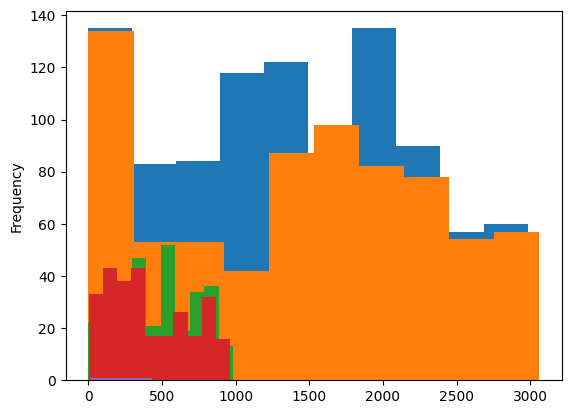

In [39]:
#two full-time halfs, and two 15-min suplementary halfs. timeperiod==5 should be penalties.
df_aux = match.groupby("period_id")
df_aux["time_seconds"].plot(kind="hist")

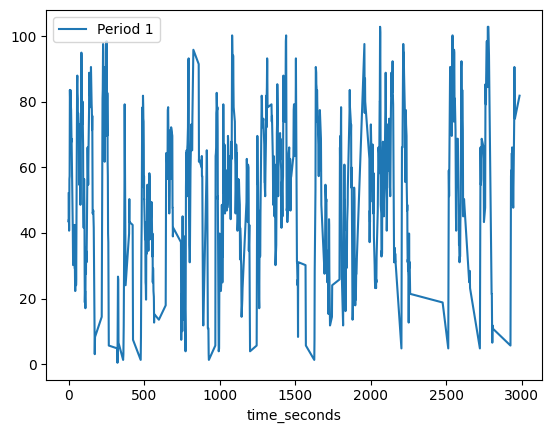

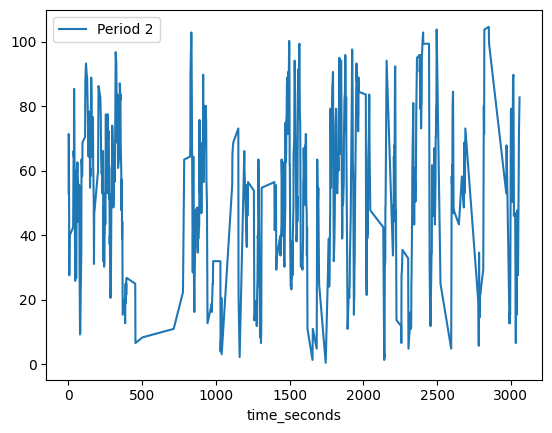

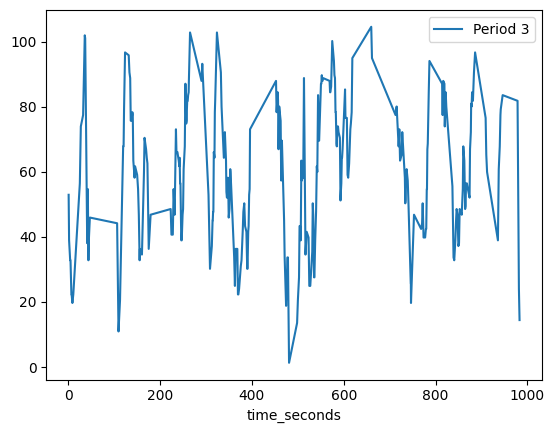

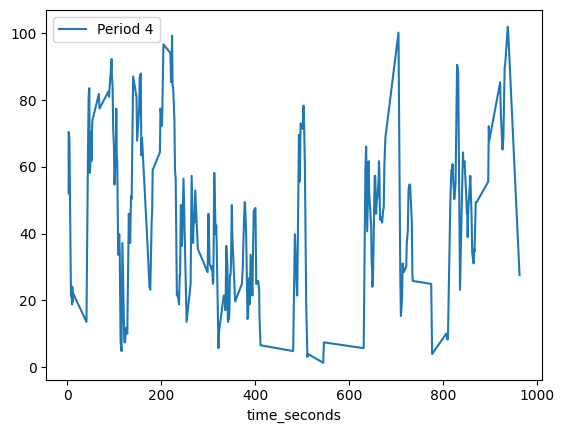

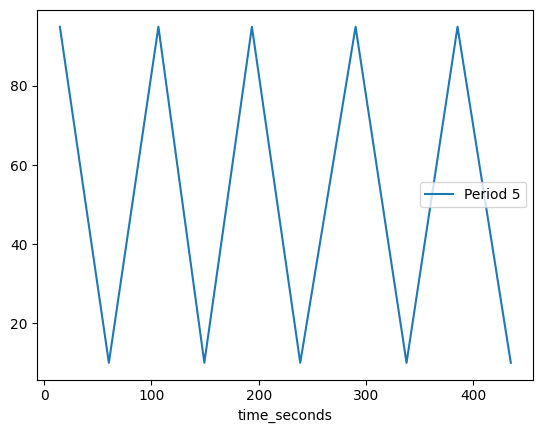

In [50]:
#Start position of actions (height of field) during time.
for name, group in match.groupby("period_id"):
    group.plot(x="time_seconds", y="start_x", kind="line", label=f'Period {name}')